In [1]:
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
data = {
    'points': [0.4, 0.6, 0.8, 0.9, 0.95, 0.98],
    'GraSP': {
        'ResNet32': {
            'original': [93.5199966430664, 93.6500015258789, 93.16999816894531, 92.29000091552734, 91.36000061035156, 88.08999633789062],
            'layerwise rearrange': [93.68000030517578, 93.69999694824219, 93.23999786376953, 92.41000366210938, 91.22000122070312, 88.81999969482422],
            'corrupted data': [93.2699966430664, 93.44999694824219, 93.05999755859375, 92.23999786376953, 91.26000213623047, 88.80000305175781]
        },
        'VGG19': {
            'original': [92.9800033569336, 93.38999938964844, 93.61000061035156, 93.13999938964844, 92.62000274658203, 92.0],
            'layerwise rearrange': [93.36000061035156, 93.41999816894531, 93.30999755859375, 93.29000091552734, 92.76000213623047, 91.83000183105469],
            'corrupted data': [93.11000061035156, 93.08999633789062, 93.23999786376953, 93.30999755859375, 92.44999694824219, 91.93000030517578]
        }
    },
    'SNIP': {
        'ResNet32': {
            'original': [94.42, 94.72, 93.84, 92.55, 90.98, 87.49],
            'layerwise rearrange': [94.49, 94.29, 93.61, 92.72, 91.35, 87.62],
            'corrupted data': [94.39, 94.11, 93.90, 92.61, 90.51, 87.63]
        },
        'VGG19': {
            'original': [93.40, 93.48, 93.22, 93.29, 93.13, 89.56],
            'layerwise rearrange': [93.23, 93.28, 93.02, 93.32, 93.20, 88.41],
            'corrupted data': [93.02, 93.19, 93.57, 93.37, 92.71, 49.13]
        }
    }
}

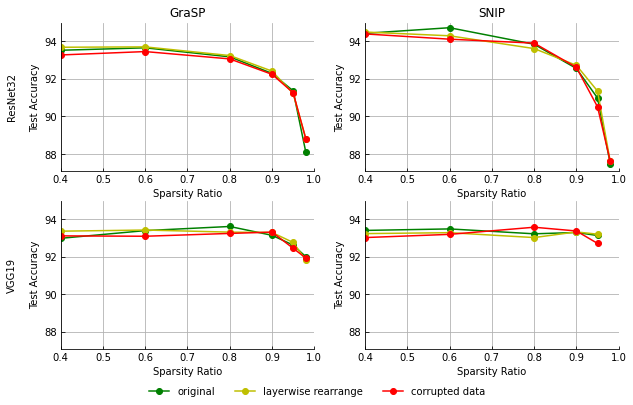

In [38]:
line_group = ['original', 'layerwise rearrange', 'corrupted data']

def eliminate_outlayer_points(arr, bounds):
    to_eliminate = set()
    for i, el in enumerate(arr):
        if el < bounds[0] or el > bounds[1]:
            to_eliminate.add(i)
    return to_eliminate


def eliminate_indexes(arr, indexes_to_eliminate):
    return [el for index, el in enumerate(arr) if index not in indexes_to_eliminate]


def remove_outlayers(points, values, bounds):
    outlayer_indexes = reduce(
        lambda accumulator, to_remove: accumulator.union(to_remove), 
        map(lambda group: eliminate_outlayer_points(group, bounds), values.values()),
        set())
    new_values = {
        k: eliminate_indexes(v, outlayer_indexes) \
        for k, v in values.items()
    }
    new_points = eliminate_indexes(points, outlayer_indexes)
    return new_points, new_values
    
    
def prepare_plot(ax, bounds):
    ax.tick_params(axis=u'both', which=u'both', direction='in')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axis([0.4, 1, *bounds])
    ax.set_xlabel('Sparsity Ratio')
    ax.set_ylabel(ax.get_ylabel() + 'Test Accuracy')
    ax.grid()

    
def plot(ax, x, y, colors):
    groups = []
    for group, color in colors.items():
        ax.plot(x, y[group], color + 'o-')
        groups.append(group)
    return groups
    
colors = {
    group: color\
    for group, color in zip(line_group, ['g', 'y', 'r'])
}
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
x = data['points']
Y_BOUNDS = (87.1, 94.99)
for i, model in enumerate(['ResNet32', 'VGG19']):
    for j, pruning_method in enumerate(['GraSP', 'SNIP']):
        ax = axs[i][j]
        if i == 0:
            ax.set_title(pruning_method)
        if j == 0:
            ax.set_ylabel(model + '\n\n')
        prepare_plot(ax, Y_BOUNDS)
        x, y = remove_outlayers(x, data[pruning_method][model], Y_BOUNDS)
        groups = plot(ax, x, y, colors)

plt.figlegend(groups, loc=8, ncol=3, frameon=False)
plt.savefig('sanity_check_plot.png', dpi=300)